In [1]:
import pandas as pd
import numpy as np

In [2]:
%%time
# df = pd.read_parquet('src/ptls-experiments/scenario_alpha_battle/data/train_transactions_contest.parquet')
df = pd.read_parquet('/home/antklen/data/alfabattle/alfabattle2_train_transactions_contest/train_transactions_contest')
print(df.shape)
df.head()

(270450065, 20)
CPU times: user 41.3 s, sys: 1min 7s, total: 1min 48s
Wall time: 8.4 s


,app_id,amnt,currency,operation_kind,card_type,operation_type,operation_type_group,ecommerce_flag,payment_system,income_flag,mcc,country,city,mcc_category,day_of_week,hour,days_before,weekofyear,hour_diff,transaction_number
0,0,0.465425,1,4,98,4,2,3,7,3,2,1,37,2,4,19,351,34,-1,1
1,0,0.000000,1,2,98,7,1,3,7,3,2,1,49,2,4,20,351,34,0,2
2,0,0.521152,1,2,98,3,1,3,7,3,2,1,37,2,4,20,351,34,0,3
3,0,0.356078,1,1,5,2,1,3,7,3,10,1,49,7,2,0,348,34,52,4
4,0,0.000000,1,2,98,7,1,3,7,3,2,1,49,2,4,16,337,53,280,5


## Explore hour_diff distribution

Возьмем выборку пользователей, чтобы быстрее производить вычисления.

In [3]:
app_ids = df.app_id.unique()
app_ids = np.random.choice(app_ids, size=30000, replace=False)
df2 = df[df.app_id.isin(app_ids)]
print(df2.shape)

(8459267, 20)


Распределение hour_diff - медиана 5, верхний квартиль - 21

In [4]:
df2.hour_diff.describe()

count    8.459267e+06
mean     2.658384e+01
std      8.890295e+01
min     -1.000000e+00
25%      1.000000e+00
50%      5.000000e+00
75%      2.100000e+01
max      8.203000e+03
Name: hour_diff, dtype: float64

#### hour_diff by transaction number

Посмотрим, есть ли какая-то зависимость hour_diff от номера транзакции

In [5]:
desc_transaction_number = df2.groupby('transaction_number').hour_diff.describe()
desc_transaction_number.head(100)

,count,mean,std,min,25%,50%,75%,max
transaction_number,,,,,,,,
1,30000.0,-1.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0
2,30000.0,150.984900,354.659355,0.0,1.0,22.0,137.0,8203.0
3,30000.0,140.092667,314.871989,0.0,1.0,22.0,118.0,6713.0
4,30000.0,128.987467,291.026973,0.0,1.0,20.0,101.0,6821.0
5,30000.0,127.548800,306.550810,0.0,1.0,20.0,96.0,7364.0
...,...,...,...,...,...,...,...,...
96,19899.0,29.841902,75.356967,0.0,1.0,8.0,25.0,2563.0
97,19839.0,29.578709,71.197304,0.0,1.0,7.0,25.0,2161.0
98,19772.0,29.896015,75.124003,0.0,1.0,7.0,25.0,2519.0


<AxesSubplot:xlabel='transaction_number'>

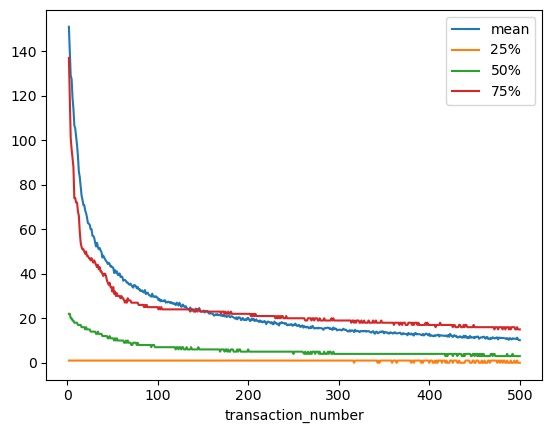

In [6]:
desc_transaction_number.loc[2:500][['mean', '25%', '50%', '75%']].plot()

Для первых транзакций значения hour_df сильно больше, потом спадают и выходят на плато.

#### hour_diff by app_id

Посмотрим, как распределены значения hour_diff для каждого пользователя по отдельности.

In [7]:
%%time
desc_app_id = df2.groupby('app_id').hour_diff.describe()

CPU times: user 36.4 s, sys: 631 ms, total: 37.1 s
Wall time: 37.1 s


In [9]:
desc_app_id.sample(10)

,count,mean,std,min,25%,50%,75%,max
app_id,,,,,,,,
220203,56.0,128.607143,205.873013,-1.0,0.00,20.5,155.00,815.0
571731,292.0,29.263699,36.737796,-1.0,2.75,20.0,41.00,240.0
943001,641.0,13.068643,32.881534,-1.0,0.00,2.0,15.00,266.0
410029,413.0,19.920097,74.767088,-1.0,1.00,3.0,16.00,716.0
801960,109.0,78.513761,101.854436,-1.0,3.00,41.0,113.00,510.0
774539,210.0,40.052381,110.786886,-1.0,0.00,4.0,28.75,1127.0
356465,1516.0,5.631266,8.627260,-1.0,0.00,2.0,6.00,96.0
284947,16.0,486.937500,400.813418,-1.0,181.75,409.5,798.75,1319.0
858257,214.0,39.677570,55.560176,-1.0,2.00,22.5,49.75,348.0


In [10]:
desc_app_id.corr()

,count,mean,std,min,25%,50%,75%,max
count,1.000000,-0.446812,-0.470801,NaN,-0.186579,-0.303088,-0.416310,-0.393780
mean,-0.446812,1.000000,0.796122,NaN,0.697089,0.878849,0.945426,0.493394
std,-0.470801,0.796122,1.000000,NaN,0.273104,0.474752,0.665252,0.830777
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-0.186579,0.697089,0.273104,NaN,1.000000,0.810569,0.618939,0.123829
50%,-0.303088,0.878849,0.474752,NaN,0.810569,1.000000,0.863286,0.220392
75%,-0.416310,0.945426,0.665252,NaN,0.618939,0.863286,1.000000,0.340973
max,-0.393780,0.493394,0.830777,NaN,0.123829,0.220392,0.340973,1.000000


Есть явная корреляция - чем больше количество транзакций у пользователя, тем меньше интервалы между ними, что более чем логично.

In [11]:
desc_app_id['50%'].describe()

count    30000.000000
mean        57.935917
std        141.134138
min          0.000000
25%          5.000000
50%         13.500000
75%         26.000000
max       1504.000000
Name: 50%, dtype: float64

#### Split by hour_summed

Посмотрим на распределение hour_diff при сплите "по времени", через кумулятивное значение hour_diff.

In [12]:
df3 = df2.copy()

df3['hour_summed'] = df3.groupby('app_id')['hour_diff'].cumsum() + 1
df3['max_hour'] = df3.groupby('app_id')['hour_summed'].transform('max')
df3['reversed_hour_summed'] = df3['max_hour'] - df3['hour_summed']

Оставляем пользователей, у которых есть история за 2 месяца, в тест берем последний месяц

In [13]:
df3 = df3[df3['max_hour'] >= 1500]
print(df3.shape, df3.app_id.nunique())
df3 = df3[df3['reversed_hour_summed'] < 720]
df3['transaction_min'] = df3.groupby('app_id')['transaction_number'].transform('min')

(8447241, 23) 29662


In [14]:
df3[df3.transaction_number == df3.transaction_min].hour_diff.describe()

count    29662.000000
mean       282.264750
std        441.255555
min          1.000000
25%         29.000000
50%        119.000000
75%        384.000000
max       8203.000000
Name: hour_diff, dtype: float64

Распределение hour_diff для первой транзакции в тесте при таком сплите кардинально отличается от распределения по всем транзакциям!

In [15]:
df3.hour_diff.describe()

count    945390.000000
mean         27.197557
std         102.895578
min           0.000000
25%           1.000000
50%           4.000000
75%          20.000000
max        8203.000000
Name: hour_diff, dtype: float64

#### Split by transaction_number

Посмотрим на распределение hour_diff при сплите по количеству транзакций - последние N транзакций в тест.

Оставляем пользователей, у которых есть 100 транзакций в истории, в тест берем последние 50.

In [19]:
df4 = df2.copy()

df4['transaction_max'] = df4.groupby('app_id').transaction_number.transform('max')
df4 = df4[df4.transaction_max >= 100]
print(df4.shape, df4.app_id.nunique())

df4['reversed_transaction'] = df4['transaction_max'] - df4['transaction_number']

df4 = df4[df4['reversed_transaction'] < 50]
df4['transaction_min'] = df4.groupby('app_id')['transaction_number'].transform('min')

(7985397, 21) 19623


In [20]:
df4[df4.transaction_number == df4.transaction_min].hour_diff.describe()

count    19623.000000
mean        27.462977
std         77.067671
min          0.000000
25%          1.000000
50%          6.000000
75%         24.000000
max       5902.000000
Name: hour_diff, dtype: float64

На этот раз распределение hour_diff для первой транзакции в тесте практически не отличается от распределения по всему датасету.

In [21]:
df4.hour_diff.describe()

count    981150.000000
mean         28.639111
std          73.368507
min           0.000000
25%           1.000000
50%           6.000000
75%          24.000000
max        5902.000000
Name: hour_diff, dtype: float64

#### Random sampled transaction for each user

Проверим еще один вариант - берем случайную транзакцию из последовательности каждого юзера (эта случайная транзакция может выступать в качестве начала теста).

Оставляем пользователей, у которых есть 100 транзакций в истории, случайную транзакцию берем из интервала от 50 до 100 (минимум первые 50 транзакций в трейн).

In [22]:
df5 = df2.copy()

df5['transaction_max'] = df5.groupby('app_id').transaction_number.transform('max')
df5 = df5[df5.transaction_max >= 100]
print(df5.shape, df5.app_id.nunique())

(7985397, 21) 19623


In [23]:
%%time
sample = df5.groupby('app_id').apply(
    lambda x: np.random.randint(50, x.transaction_max.iloc[0], size=1)[0]).rename('transaction_number').reset_index()

CPU times: user 1.6 s, sys: 166 ms, total: 1.76 s
Wall time: 1.76 s


In [24]:
sample = pd.merge(df2, sample)
print(sample.shape)
sample.head()

(19623, 20)


,app_id,amnt,currency,operation_kind,card_type,operation_type,operation_type_group,ecommerce_flag,payment_system,income_flag,mcc,country,city,mcc_category,day_of_week,hour,days_before,weekofyear,hour_diff,transaction_number
0,2,0.429281,1,2,51,7,1,1,1,1,2,1,46,2,1,15,216,2,240,88
1,42,0.367687,1,1,17,2,1,1,2,1,34,1,1,12,4,18,312,36,0,63
2,79,0.367607,1,1,35,2,1,2,2,1,68,1,163,17,5,20,292,28,19,284
3,123,0.302325,1,1,54,2,1,1,2,1,1,1,59,1,5,14,26,51,44,168
4,127,0.522181,1,4,5,4,2,1,3,2,2,1,2,2,5,19,96,17,6,65


In [25]:
sample.hour_diff.describe()

count    19623.000000
mean        27.424043
std         67.411993
min          0.000000
25%          1.000000
50%          6.000000
75%         24.000000
max       1693.000000
Name: hour_diff, dtype: float64

Распределение hour_diff для первой транзакции в тесте слабо отличается от распределения по всему датасету.

In [29]:
df5.hour_diff.describe()

count    7.985397e+06
mean     1.949454e+01
std      5.481619e+01
min     -1.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      2.000000e+01
max      6.117000e+03
Name: hour_diff, dtype: float64

#### Split for sample of users

Протестируем сплит на сэмпле юзеров, чтобы понять, какое количество пользователей теряется.

In [30]:
MIN_NUMBER_OF_TRANSACTIONS = 100
VALIDATION_TRANSACTIONS = 50

In [31]:
df6 = df2.copy()

print(df6.shape, df6.app_id.nunique())
df6['transaction_max'] = df6.groupby('app_id').transaction_number.transform('max')
df6 = df6[df6.transaction_max >= MIN_NUMBER_OF_TRANSACTIONS]
print(df6.shape, df6.app_id.nunique())

df6['reversed_transaction'] = df6['transaction_max'] - df6['transaction_number']

(8459267, 20) 30000
(7985397, 21) 19623


In [32]:
train_df = df6[df6['reversed_transaction'] >= VALIDATION_TRANSACTIONS]
valid_df = df6[df6['reversed_transaction'] < VALIDATION_TRANSACTIONS]
print(train_df.shape, valid_df.shape)

(7004247, 22) (981150, 22)


In [33]:
valid_df['hour_summed'] = valid_df.groupby('app_id')['hour_diff'].cumsum()
hour_max = valid_df.groupby('app_id').hour_summed.max()

/tmp/ipykernel_13970/1467607442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['hour_summed'] = valid_df.groupby('app_id')['hour_diff'].cumsum()


In [34]:
(hour_max >= 720).sum(), (hour_max < 720).sum()

(13212, 6411)

## Final Split

Сплит всего датасета.

In [35]:
MIN_NUMBER_OF_TRANSACTIONS = 100
VALIDATION_TRANSACTIONS = 50
VALIDATION_NUM_HOURS = 24 * 30

In [36]:
%%time
df['transaction_max'] = df.groupby('app_id').transaction_number.transform('max')

CPU times: user 4.99 s, sys: 3.07 s, total: 8.06 s
Wall time: 8.06 s


Оставляем пользователей, у которых есть заданное количество транзакций.

In [37]:
%%time
print(df.shape, df.app_id.nunique())
df = df[df.transaction_max >= MIN_NUMBER_OF_TRANSACTIONS]
print(df.shape, df.app_id.nunique())

(270450065, 21) 963811
(255394648, 21) 634036
CPU times: user 26.2 s, sys: 23 s, total: 49.3 s
Wall time: 48.8 s


In [38]:
%%time
df['reversed_transaction'] = df['transaction_max'] - df['transaction_number']

CPU times: user 644 ms, sys: 353 ms, total: 997 ms
Wall time: 452 ms


Берем последние транзакции в валидацию, первые в трейн.

In [39]:
%%time
train_df = df[df['reversed_transaction'] >= VALIDATION_TRANSACTIONS]
valid_df = df[df['reversed_transaction'] < VALIDATION_TRANSACTIONS]
print(train_df.shape, valid_df.shape)

(223692848, 22) (31701800, 22)
CPU times: user 23.8 s, sys: 10.8 s, total: 34.6 s
Wall time: 33.8 s


In [40]:
%%time
valid_df['hour_summed'] = valid_df.groupby('app_id')['hour_diff'].cumsum()
hour_summed_max = valid_df.groupby('app_id').hour_summed.max()

<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1.15 s, sys: 260 ms, total: 1.41 s
Wall time: 1.4 s


In [41]:
(hour_summed_max >= VALIDATION_NUM_HOURS).sum(), (hour_summed_max < VALIDATION_NUM_HOURS).sum()

(430309, 203727)

Оставляем только тех пользователей, у которых в валидации есть история минимум за месяц.

После этого оставляем в валидации историю только за месяц, более длинную не берем.

In [42]:
%%time
app_ids = hour_summed_max[hour_summed_max >= VALIDATION_NUM_HOURS].index

train_df = train_df[train_df.app_id.isin(app_ids)]
valid_df = valid_df[valid_df.app_id.isin(app_ids)]
valid_df = valid_df[valid_df.hour_summed <= VALIDATION_NUM_HOURS]
print(train_df.shape, valid_df.shape)

(95046149, 22) (11183197, 23)
CPU times: user 8.84 s, sys: 2.76 s, total: 11.6 s
Wall time: 11.5 s


Посмотрим на статистики получившегося датасета.

<AxesSubplot:>

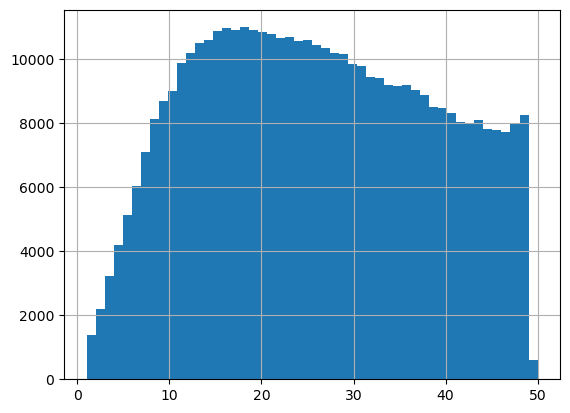

In [43]:
valid_df.groupby('app_id').size().hist(bins=50)

In [45]:
valid_df['transaction_min'] = valid_df.groupby('app_id')['transaction_number'].transform('min')

In [46]:
valid_df[valid_df.transaction_number == valid_df.transaction_min].hour_diff.describe()

count    429711.000000
mean         33.739544
std          67.746008
min           0.000000
25%           1.000000
50%          12.000000
75%          31.000000
max         720.000000
Name: hour_diff, dtype: float64

In [47]:
valid_df.hour_diff.describe()

count    1.118320e+07
mean     2.460099e+01
std      4.700374e+01
min      0.000000e+00
25%      1.000000e+00
50%      8.000000e+00
75%      2.500000e+01
max      7.200000e+02
Name: hour_diff, dtype: float64

In [48]:
train_df.hour_diff.describe()

count    9.504615e+07
mean     2.735514e+01
std      6.734940e+01
min     -1.000000e+00
25%      1.000000e+00
50%      7.000000e+00
75%      2.500000e+01
max      6.932000e+03
Name: hour_diff, dtype: float64

In [30]:
%%time
train = train_df.groupby('app_id')['mcc', 'amnt', 'hour_diff',
                                   'day_of_week', 'hour', 'weekofyear'].agg(list).reset_index()

<timed exec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


CPU times: user 1min 19s, sys: 11.3 s, total: 1min 30s
Wall time: 1min 30s


In [31]:
%%time
valid = valid_df.groupby('app_id')['mcc', 'amnt', 'hour_diff',
                                   'day_of_week', 'hour', 'weekofyear'].agg(list).reset_index()

<timed exec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


CPU times: user 32.8 s, sys: 3.19 s, total: 36 s
Wall time: 35.9 s


In [39]:
%%time
train.to_parquet('data/train.parquet', index=False)
valid.to_parquet('data/valid.parquet', index=False)

IOStream.flush timed out


CPU times: user 45.9 s, sys: 9.09 s, total: 55 s
Wall time: 53.9 s


In [ ]:
!ls -lh data/

total 4.7G
-rw-rw-r-- 1 antklen antklen 1.9G Aug 14 12:55 alfa_train.parquet
-rw-rw-r-- 1 antklen antklen  45K Aug 14 13:50 mcc_quantiles.csv
-rw-rw-r-- 1 antklen antklen 111M Aug 15 10:11 test1.parquet
-rw-rw-r-- 1 antklen antklen 1.7G Aug 15 10:11 train1.parquet
-rw-rw-r-- 1 antklen antklen 797M Aug 21 14:06 train.parquet
-rw-rw-r-- 1 antklen antklen 111M Aug 15 10:11 val1.parquet
-rw-rw-r-- 1 antklen antklen  99M Aug 21 14:06 valid.parquet
